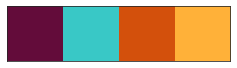

In [79]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [80]:
# Import my spotify data
songs = pd.read_csv("moods_dataset.csv").drop_duplicates()

songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1340
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1339 non-null   object 
 1   id            1339 non-null   object 
 2   mood          1339 non-null   object 
 3   danceability  1339 non-null   float64
 4   energy        1339 non-null   float64
 5   loudness      1339 non-null   float64
 6   speechiness   1339 non-null   float64
 7   acousticness  1339 non-null   float64
 8   tempo         1339 non-null   float64
 9   liveness      1339 non-null   float64
 10  valence       1339 non-null   float64
dtypes: float64(8), object(3)
memory usage: 125.5+ KB


In [88]:

songs = songs.drop(['energy','valence','tempo'],axis=1)
songs.head()

KeyError: "['energy' 'valence' 'tempo'] not found in axis"

In [82]:
# to describe numerical features we can use describe()
songs.describe()

,danceability,loudness,speechiness,acousticness,liveness
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,0.622490,-9.986689,0.073067,0.458786,0.158154
std,0.159548,5.553885,0.068299,0.335776,0.116389
min,0.092600,-38.658000,0.024600,0.000160,0.024800
25%,0.524000,-11.292500,0.036700,0.131000,0.097800
50%,0.646000,-8.597000,0.048200,0.424000,0.113000
75%,0.740000,-6.648000,0.079100,0.774000,0.174000
max,0.951000,-2.839000,0.479000,0.996000,0.809000


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>, <AxesSubplot:>]],
      dtype=object)

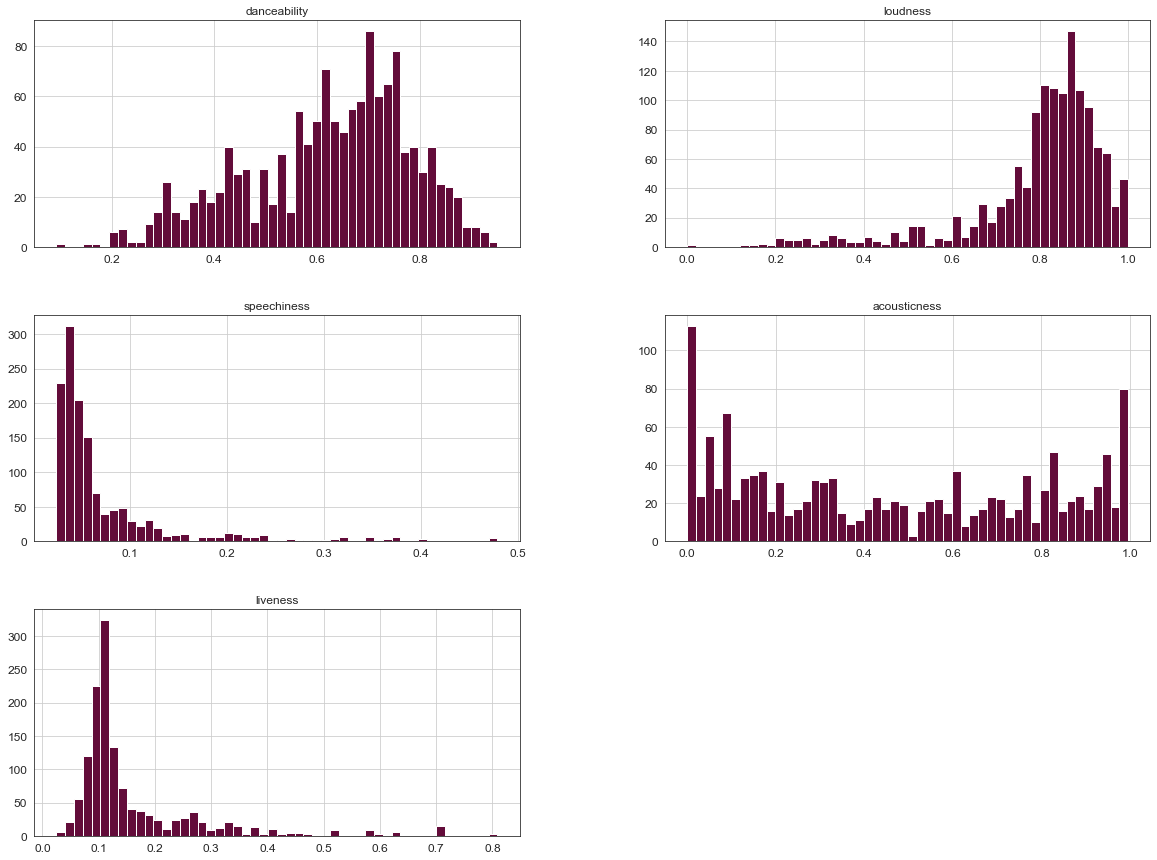

In [83]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)




songs.hist(bins=50,figsize=(20,15))

Most features are skewed to the left or the right


In [84]:
# from pandas.plotting import scatter_matrix
# # attributes should contain the features we want to compare
# attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence']

# scatter_matrix(songs[attr],figsize=(12,8))

In [85]:
# remove song names, artist and id before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['name','id','mood'],axis=1)



In [86]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [28]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4786841233032204)
For n_clusters = 3, silhouette score is 0.37530069628036555)
For n_clusters = 4, silhouette score is 0.3144615256988395)
For n_clusters = 5, silhouette score is 0.2959193804370799)
For n_clusters = 6, silhouette score is 0.2842943209090045)
For n_clusters = 7, silhouette score is 0.28339366050482245)
For n_clusters = 8, silhouette score is 0.2991551670068546)
For n_clusters = 9, silhouette score is 0.3111082758413151)
For n_clusters = 10, silhouette score is 0.2754705781127951)
For n_clusters = 11, silhouette score is 0.2914576052767017)
For n_clusters = 12, silhouette score is 0.25840840925555025)
For n_clusters = 13, silhouette score is 0.24275542579051546)
For n_clusters = 14, silhouette score is 0.282327894036534)


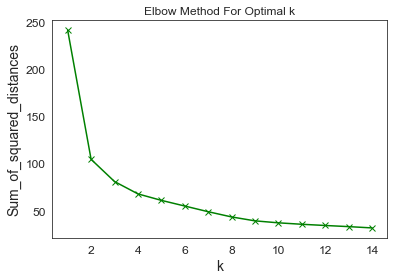

In [29]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)


KMeans(n_clusters=4)

In [31]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


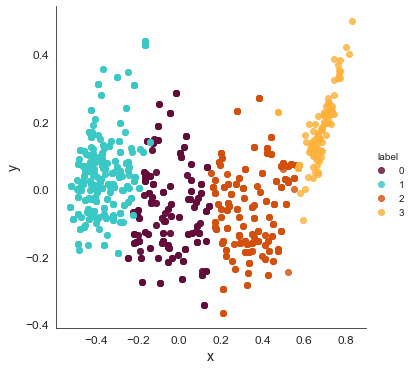

In [32]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [33]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

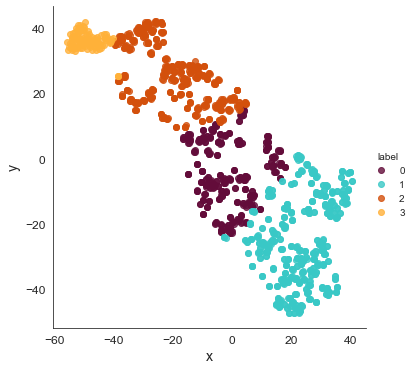

In [34]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [35]:
pca.explained_variance_ratio_

array([0.72716417, 0.10655161])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. By looking at the explained_variance_ratio_ we can see the 1st component contains 87% and the 2nd 5% which implies we've retained 92% of the original variance in the data which is awesome! 

In [36]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.271421 -0.297859    -0.021412      0.914505 -0.028857
PC-2     -0.813931 -0.405745    -0.078690     -0.370129  0.172338


# Next step lets explore each of the 4 clusters and see what songs they contain

In [37]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

1    508
2    396
0    336
3    101
Name: label, dtype: int64

In [72]:
songs[songs['label'] == 0].head(10)

,name,id,mood,danceability,loudness,speechiness,acousticness,liveness,label
949,Better Together,4VywXu6umkIQ2OS0m1I79y,sad,0.868,0.813228,0.0536,0.308,0.1100,0
93,Who Would Have Thought,1ws2DVEGJD2d12aDm4zqic,energetic,0.420,0.871158,0.0298,0.461,0.2600,0
822,favorite color,10ppCCOjLF6K1XnxTkktwN,cheerful,0.664,0.879142,0.1980,0.380,0.1850,0
446,Mindfulness,2WYiVWTXflf49CyF5Vgn93,chill,0.472,0.795946,0.0463,0.435,0.1030,0
762,Multicolored,5zrDAu61cHNLRFMPtwJJuW,cheerful,0.594,0.753929,0.0406,0.494,0.1290,0
71,Stay With Me,7IHOIqZUUInxjVkko181PB,romantic,0.500,0.896815,0.0377,0.566,0.1100,0
968,Photograph,1HNkqx9Ahdgi1Ixy2xkKkL,sad,0.614,0.786677,0.0476,0.607,0.0986,0
1156,I Woke Up Late (Again...),5NeYErar7a7hszYND0vdSs,sad,0.751,0.821408,0.0620,0.283,0.0729,0
1012,Cool Again,0xM6mdl0XX2qOqUZmVUp97,sad,0.774,0.887741,0.0896,0.443,0.1270,0
905,better with you,0OPIBKjAYBFzNpo1HzjqzQ,sad,0.623,0.820821,0.0606,0.525,0.1850,0


In [73]:
songs[songs['label']==1].tail(50)

,name,id,mood,danceability,loudness,speechiness,acousticness,liveness,label
1185,Producer Man,5BArc3UpONi77FMkNT4LYU,sad,0.660,0.929507,0.2230,0.12900,0.2560,1
365,You Make Me Feel Good - Original Mix,1wW0yMVo6dVxWZkmduKEWC,chill,0.794,0.910774,0.0525,0.09150,0.0586,1
1092,Late Checkout,3J0J198M7pTufTPMPVmVRL,sad,0.534,0.915659,0.2410,0.33300,0.6250,1
1085,Happified,1qzo9Nl3xb3Nc28whqnMBK,sad,0.609,0.859655,0.3430,0.08910,0.2630,1
829,Tangerine,0WRPGrwIiWYa2lCE6OVdtl,cheerful,0.849,0.894721,0.0561,0.09300,0.1770,1
515,The Source,2JwP32RN0DB4dqmZmWqANH,chill,0.769,0.829225,0.0551,0.08950,0.1610,1
779,SAMO,6GuiDpEuU8J3L2gKRObRhq,cheerful,0.785,0.870934,0.1940,0.00412,0.1940,1
823,Arizona Summer,3bxlVq7OILLAU55cV9r9vv,cheerful,0.719,0.942684,0.0414,0.01430,0.0708,1
756,Geistgeschwür,2lDJxK0xBLHf2oNDh2DoMY,cheerful,0.781,0.849912,0.2100,0.00375,0.0912,1
1013,Oh Devil - Radio Version,6KwSdmAba8BxoxVXPw70LO,sad,0.899,0.927832,0.0719,0.18600,0.2170,1


In [40]:
songs[songs['label']==2].head(30)

,name,id,mood,danceability,loudness,speechiness,acousticness,liveness,label
1130,Matagal,5hUjfGbIJlv89IqEt74kAI,sad,0.816,0.953265,0.2410,0.799,0.1110,2
32,ocean eyes - Recorded Live at Jungle City Studios,7rLokcIMP9p8fl0iROdVfC,romantic,0.353,0.713309,0.0421,0.934,0.1120,2
507,Eternal Sunshine,5AJ7rz4GruAuk3I43sAgxa,chill,0.682,0.754237,0.0488,0.652,0.1770,2
107,I Ain't Ever Loved No One - Acoustic,3i8ZkeKgwu1t4m8SPPzNvv,energetic,0.320,0.668081,0.0329,0.629,0.1060,2
60,Somewhere Only We Know,3DDGhkxq3FeUorZppSgeLE,romantic,0.314,0.794746,0.0350,0.935,0.0999,2
637,Pink Lemonade,3BYUbrFKwIPYGmFwQkx8qU,cheerful,0.753,0.827326,0.2230,0.765,0.5210,2
946,Kiss Me,0Tel1fmuCxEFV6wBLXsEdk,sad,0.589,0.613864,0.0498,0.640,0.0248,2
279,Home To You,0qBug5X3DaJv2zgXtp55wn,chill,0.619,0.676150,0.0382,0.808,0.0971,2
783,Connection,0lITZkGUYnYSBS6z2SMEWp,cheerful,0.588,0.767693,0.0488,0.922,0.1050,2
443,Phoebe,0jVcDTCdWPPPka66nfuyVu,chill,0.494,0.716268,0.0768,0.604,0.0895,2


In [41]:
songs[songs['label']==3].head(40)

,name,id,mood,danceability,loudness,speechiness,acousticness,liveness,label
1264,Qui vivra verra,2jOawh03Qd5vi7sFRsvXRd,sad,0.450,0.410592,0.0378,0.992,0.1170,3
1335,Just a Dream,4KKRY4CLfEQoh4Yri3XwEZ,sad,0.549,0.351434,0.0595,0.994,0.0985,3
1277,"Fac, si facis",2IY3kKLHPXMLe1wJKAOIyp,sad,0.379,0.209274,0.0540,0.995,0.0884,3
1257,Fragments,70JLpMenajRsMtCXaQ1jzu,sad,0.527,0.253608,0.0487,0.994,0.1120,3
1299,rays of sunshine,5hS865BOtarOiLTDbz2CXK,sad,0.517,0.325609,0.0414,0.995,0.1020,3
1337,Berceuse,1RlKqfplkNXkV5ZkFZlo7d,sad,0.438,0.178034,0.0460,0.996,0.0782,3
1315,Vacillation,26uHrUv4hH061xE536Gn78,sad,0.376,0.468271,0.0414,0.989,0.1160,3
1327,Portmeirion,2rNL1zppqgwWIzozc1UEq2,sad,0.400,0.471565,0.0460,0.993,0.1480,3
1301,lament,3Y6mpGfRjQjZmHEDmz4lOB,sad,0.322,0.324548,0.0408,0.995,0.0799,3
1267,Mother,7cewGJQD5mApwm7C4O4CJg,sad,0.529,0.345347,0.0946,0.993,0.1060,3


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

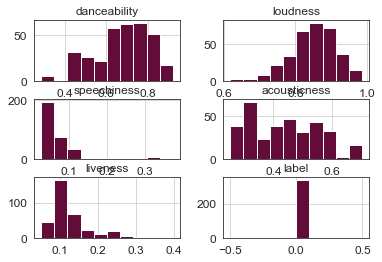

In [70]:
songs[songs['label']==0].hist()

In [43]:
songs[songs['label']==3].mean()

danceability    0.379204
loudness        0.375572
speechiness     0.045762
acousticness    0.978931
liveness        0.115588
label           3.000000
dtype: float64

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)
    

In [64]:


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[108   0   0   0]
 [  0 174   0   0]
 [  0   0 131   0]
 [  0   0   0  30]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

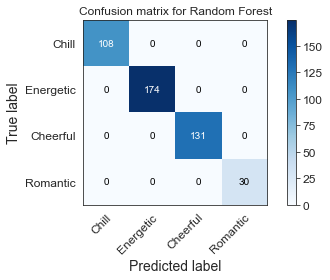

In [65]:
# Confusion matrix
definitions = ['Chill','Energetic','Cheerful','Sad']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [48]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.09418017197393443),
 ('loudness', 0.163699498201155),
 ('speechiness', 0.03561872462948823),
 ('acousticness', 0.6660950419519589),
 ('liveness', 0.04040656324346344)]

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [50]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[108   0   0   0]
 [  1 173   0   0]
 [  1   0 130   0]
 [  0   0   0  30]]


<AxesSubplot:title={'center':'Confusion matrix for KNN'}, xlabel='Predicted label', ylabel='True label'>

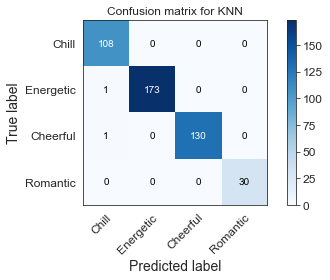

In [51]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [52]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[104   0   4   0]
 [  1 173   0   0]
 [  0   0 131   0]
 [  0   0   4  26]]


<AxesSubplot:title={'center':'Confusion matrix for SVM'}, xlabel='Predicted label', ylabel='True label'>

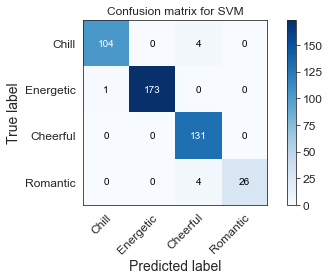

In [53]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [56]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[106   0   2   0]
 [  1 173   0   0]
 [  0   0 131   0]
 [  0   0   3  27]]


<AxesSubplot:title={'center':'Confusion matrix for MLP'}, xlabel='Predicted label', ylabel='True label'>

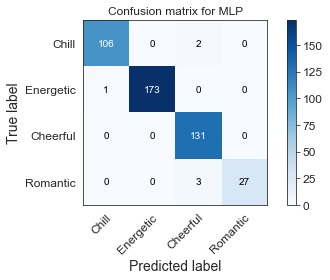

In [57]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [58]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Chill       0.99      0.98      0.99       108
   Energetic       1.00      0.99      1.00       174
    Cheerful       0.96      1.00      0.98       131
    Romantic       1.00      0.90      0.95        30

    accuracy                           0.99       443
   macro avg       0.99      0.97      0.98       443
weighted avg       0.99      0.99      0.99       443
MLP


In [59]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Chill       0.99      0.96      0.98       108
   Energetic       1.00      0.99      1.00       174
    Cheerful       0.94      1.00      0.97       131
    Romantic       1.00      0.87      0.93        30

    accuracy                           0.98       443
   macro avg       0.98      0.96      0.97       443
weighted avg       0.98      0.98      0.98       443
SVM


In [60]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Chill       0.98      1.00      0.99       108
   Energetic       1.00      0.99      1.00       174
    Cheerful       1.00      0.99      1.00       131
    Romantic       1.00      1.00      1.00        30

    accuracy                           1.00       443
   macro avg       1.00      1.00      1.00       443
weighted avg       1.00      1.00      1.00       443
KNN


In [61]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Chill       1.00      1.00      1.00       108
   Energetic       1.00      1.00      1.00       174
    Cheerful       1.00      1.00      1.00       131
    Romantic       1.00      1.00      1.00        30

    accuracy                           1.00       443
   macro avg       1.00      1.00      1.00       443
weighted avg       1.00      1.00      1.00       443
forest
